In [178]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


In [179]:
df = pd.read_table('clean_dataset.csv', sep=";")
df.head()

,id,purchase_date,day_of_the_week,product_name,brand_name,price,discount_amount,season,hormonal_cycle,proximity_to_my_salary_date,category
0,1,16.04.2025,Wednesday,Eklips Kalemtıraş,Gratis,"45,00",NaN,Spring,0,15.0,Makeup
1,2,16.04.2025,Wednesday,Duru Kiraz Çiçeği Organik Sabun,Gratis,"75,00","0,40",Spring,0,15.0,Selfcare
2,3,16.04.2025,Wednesday,Çan Kollu Vücuda Oturan Gömlek,Bershka,"1090,00",NaN,Spring,0,15.0,Clothing
3,4,16.04.2025,Wednesday,Uzun Kollu ve Büzgülü T-Shirt,Bershka,"620,00","0,40",Spring,0,15.0,Clothing
4,5,20.03.2025,Thursday,Almost Lipstick Ruj - Black Honey,Clinique,"868,00","0,20",Spring,0,19.0,Makeup


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           78 non-null     int64  
 1   purchase_date                78 non-null     object 
 2   day_of_the_week              78 non-null     object 
 3   product_name                 78 non-null     object 
 4   brand_name                   78 non-null     object 
 5   price                        78 non-null     object 
 6   discount_amount              48 non-null     object 
 7   season                       78 non-null     object 
 8   hormonal_cycle               78 non-null     int64  
 9   proximity_to_my_salary_date  57 non-null     float64
 10  category                     78 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 6.8+ KB


In [181]:
# Replaced commas with dots in the 'price' column to standardize decimal format, then convert the column to 'float' for numerical analysis
df['price'] = df['price'].str.replace(',', '.').astype(float)

# Did the same for the 'discount_amount' column to ensure numeric formatting
df['discount_amount'] = df['discount_amount'].str.replace(',', '.').astype(float)

# Convert the 'purchase_date' column from string to datetime format
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format='%d.%m.%Y')


In [182]:
df.describe()

,id,purchase_date,price,discount_amount,hormonal_cycle,proximity_to_my_salary_date
count,78.000000,78,78.000000,48.000000,78.000000,57.000000
mean,39.500000,2024-12-13 09:50:46.153846272,561.337436,0.310208,0.294872,12.017544
min,1.000000,2024-03-31 00:00:00,30.200000,0.040000,0.000000,0.000000
25%,20.250000,2024-09-22 12:00:00,283.992500,0.107500,0.000000,4.000000
50%,39.500000,2025-02-02 00:00:00,466.845000,0.300000,0.000000,10.000000
75%,58.750000,2025-03-07 06:00:00,703.307500,0.460000,1.000000,17.000000
max,78.000000,2025-04-16 00:00:00,3000.000000,0.700000,1.000000,29.000000
std,22.660538,NaN,471.808100,0.208638,0.458936,8.683916


In [183]:
missingValues = df.isnull().sum()
print(missingValues)

id                              0
purchase_date                   0
day_of_the_week                 0
product_name                    0
brand_name                      0
price                           0
discount_amount                30
season                          0
hormonal_cycle                  0
proximity_to_my_salary_date    21
category                        0
dtype: int64


In [184]:
df['has_discount'] = df['discount_amount'].notna()
df.head()

,id,purchase_date,day_of_the_week,product_name,brand_name,price,discount_amount,season,hormonal_cycle,proximity_to_my_salary_date,category,has_discount
0,1,2025-04-16,Wednesday,Eklips Kalemtıraş,Gratis,45.0,NaN,Spring,0,15.0,Makeup,False
1,2,2025-04-16,Wednesday,Duru Kiraz Çiçeği Organik Sabun,Gratis,75.0,0.4,Spring,0,15.0,Selfcare,True
2,3,2025-04-16,Wednesday,Çan Kollu Vücuda Oturan Gömlek,Bershka,1090.0,NaN,Spring,0,15.0,Clothing,False
3,4,2025-04-16,Wednesday,Uzun Kollu ve Büzgülü T-Shirt,Bershka,620.0,0.4,Spring,0,15.0,Clothing,True
4,5,2025-03-20,Thursday,Almost Lipstick Ruj - Black Honey,Clinique,868.0,0.2,Spring,0,19.0,Makeup,True


In [185]:
# If 'proximity_to_my_salary_date' is not missing, it means I had a salary at that time (1), otherwise 0
df['has_salary'] = df['proximity_to_my_salary_date'].notna().astype(int)
df.head()

,id,purchase_date,day_of_the_week,product_name,brand_name,price,discount_amount,season,hormonal_cycle,proximity_to_my_salary_date,category,has_discount,has_salary
0,1,2025-04-16,Wednesday,Eklips Kalemtıraş,Gratis,45.0,NaN,Spring,0,15.0,Makeup,False,1
1,2,2025-04-16,Wednesday,Duru Kiraz Çiçeği Organik Sabun,Gratis,75.0,0.4,Spring,0,15.0,Selfcare,True,1
2,3,2025-04-16,Wednesday,Çan Kollu Vücuda Oturan Gömlek,Bershka,1090.0,NaN,Spring,0,15.0,Clothing,False,1
3,4,2025-04-16,Wednesday,Uzun Kollu ve Büzgülü T-Shirt,Bershka,620.0,0.4,Spring,0,15.0,Clothing,True,1
4,5,2025-03-20,Thursday,Almost Lipstick Ruj - Black Honey,Clinique,868.0,0.2,Spring,0,19.0,Makeup,True,1


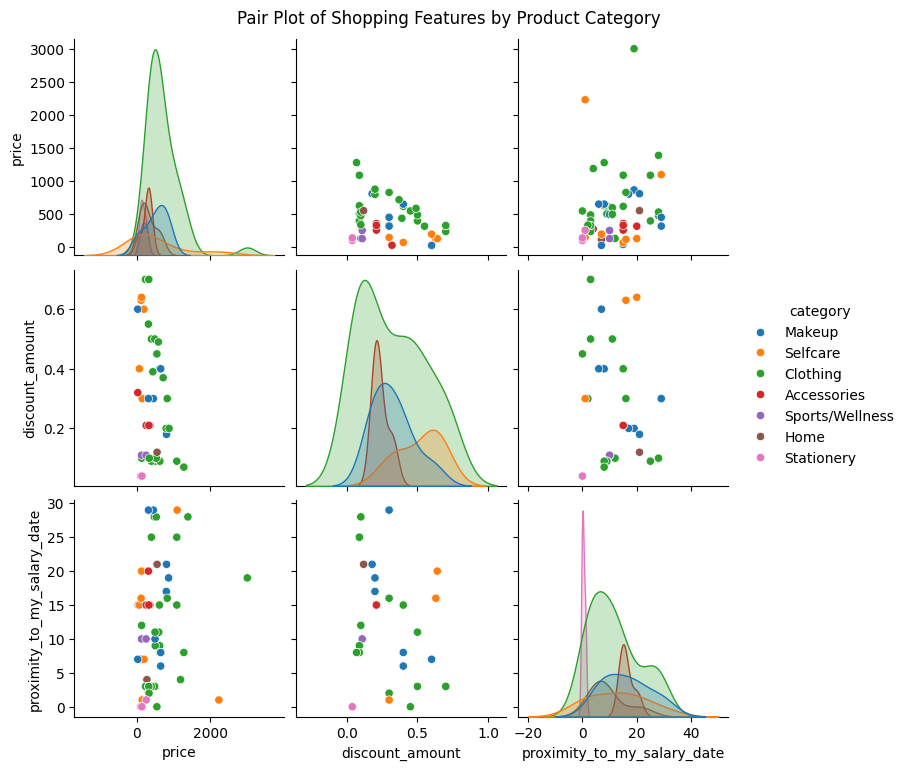

In [186]:
sns.pairplot(df,
             vars=['price', 'discount_amount', 'proximity_to_my_salary_date'],
             hue='category')
plt.suptitle('Pair Plot of Shopping Features by Product Category', y=1.02)
plt.savefig('shopping_pairplot.png')
plt.show()

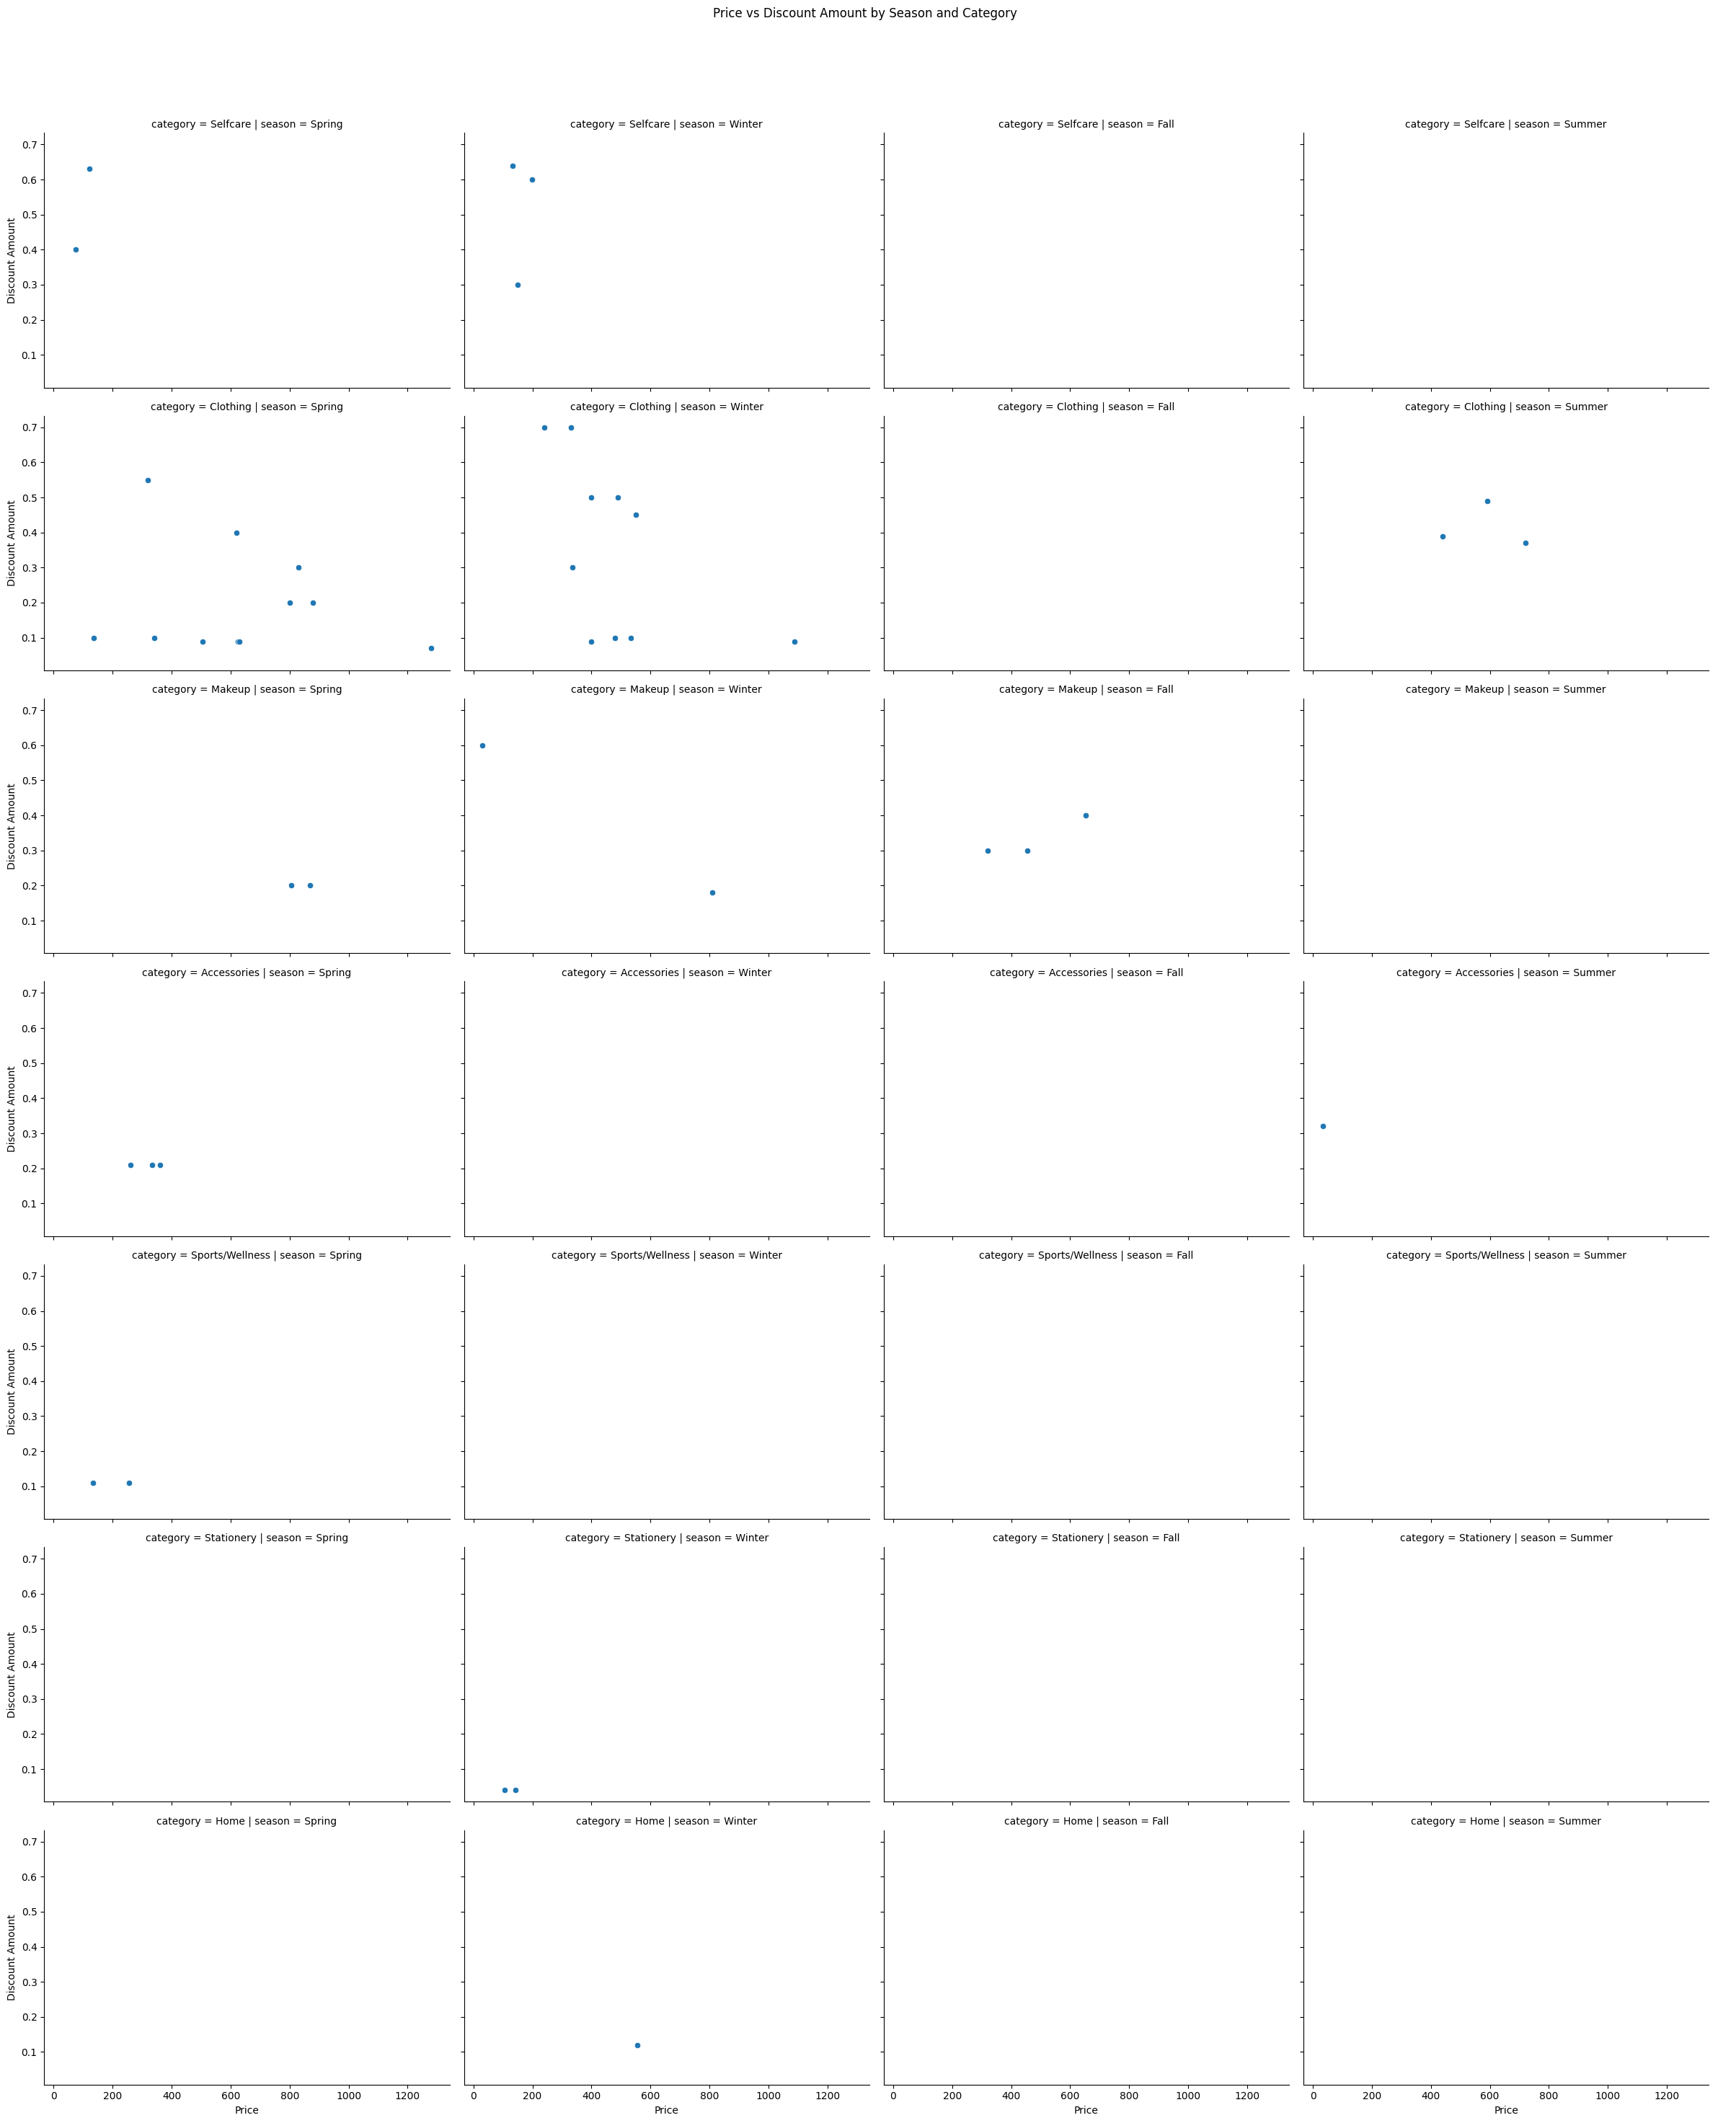

In [187]:
discounted_df = df[df['discount_amount'].notna()]

g = sns.FacetGrid(discounted_df, col="season", row="category", height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x="price", y="discount_amount")
g.set_axis_labels("Price", "Discount Amount")
g.add_legend()
g.fig.suptitle('Price vs Discount Amount by Season and Category', y=1.05)
plt.savefig('shopping_facetgrid.png', bbox_inches='tight')
plt.show()

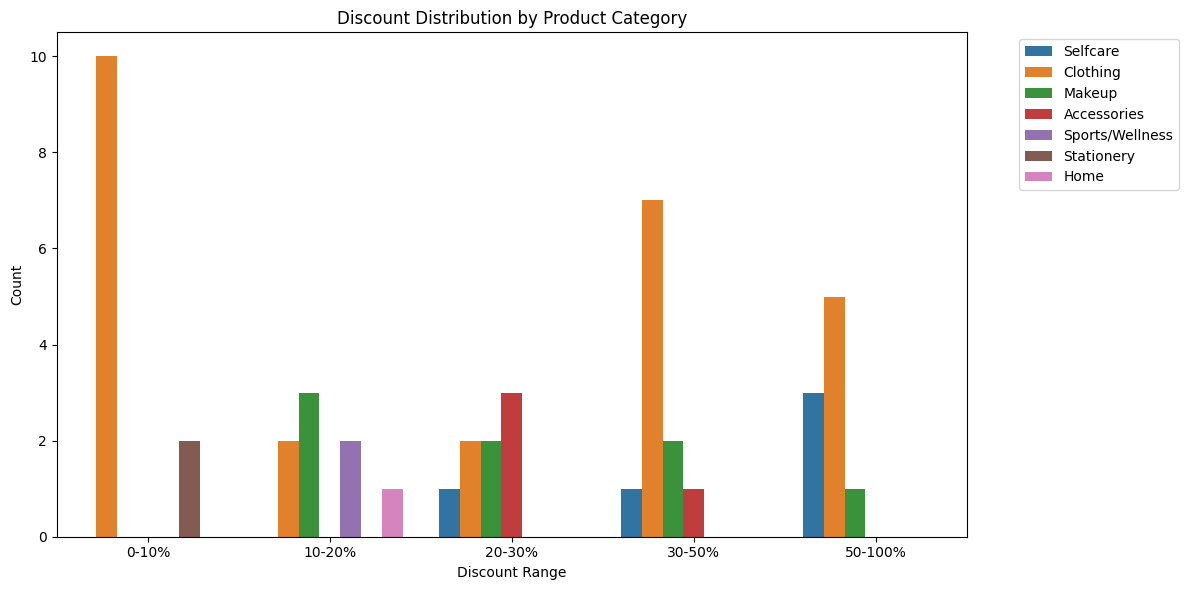

In [188]:
discounted_df = df[df['discount_amount'].notna()].copy()
discounted_df['discount_group'] = pd.cut(
    discounted_df['discount_amount'],
    bins=[0, 0.1, 0.2, 0.3, 0.5, 1.0],
    labels=['0-10%', '10-20%', '20-30%', '30-50%', '50-100%']
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=discounted_df,
    x='discount_group',
    hue='category',
    order=['0-10%', '10-20%', '20-30%', '30-50%', '50-100%']
)
plt.title('Discount Distribution by Product Category')
plt.xlabel('Discount Range')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('discount_distribution.png', bbox_inches='tight')
plt.show()

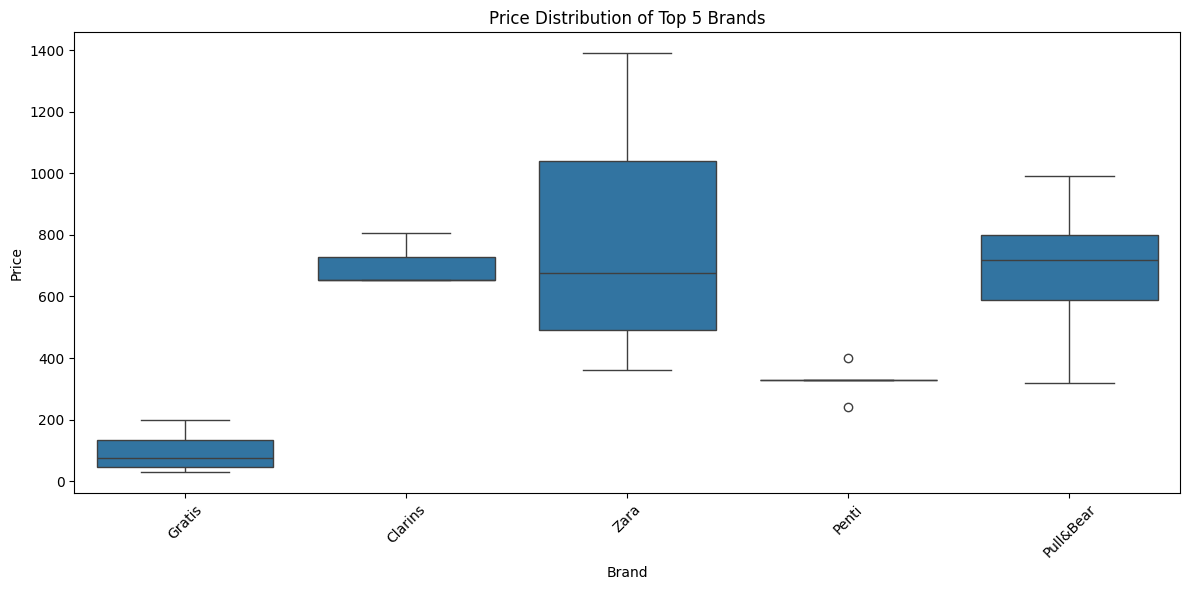

In [189]:
top_brands = df['brand_name'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_name', y='price', data=df[df['brand_name'].isin(top_brands)])
plt.title('Price Distribution of Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('brand_price_comparison.png')
plt.show()

# Hypothesis Testing

***Null Hypothesis (H0):*** The average spending is equal across all days of the week.

***Alternative Hypothesis (HA):*** At least one day has a different average spending compared to the others.

***Methods:*** 
* I will use one-way ANOVA test at a significance level of α = 0.05.
* If **p-value < 0.05**, reject the null hypothesis (H0), which means that there is a statistically significant difference in the average spending across the days of the week.
* If **p-value ≥ 0.05**, fail to reject the null hypothesis (H0), which means there is no statistically significant difference in the average spending across the days of the week.

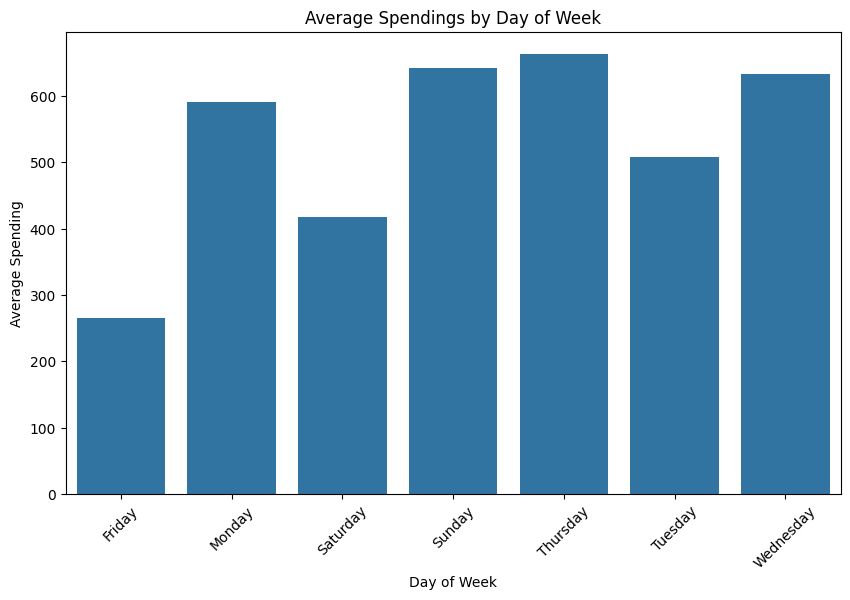

ANOVA results - F-statistic: 0.6527 p-value: 0.6878


In [190]:
daySpending = df.groupby('day_of_the_week')['price'].agg(['mean', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(x=daySpending.index, y=daySpending['mean'])
plt.title('Average Spendings by Day of Week')
plt.ylabel('Average Spending')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

days = df['day_of_the_week'].unique()
samples = [df[df['day_of_the_week'] == day]['price'] for day in days]
f_stat, p_value = stats.f_oneway(*samples)

print("ANOVA results - F-statistic:", format(f_stat, ".4f"), "p-value:", format(p_value, ".4f"))

***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

Hence, average spending does not differ significantly across the days of the week.

### Frequency of Purchases

***Null Hypothesis (H0):*** Purchases are evenly distributed across days.

***Alternative Hypothesis (HA):*** Frequency of purchases varies significantly by day.

***Methods:***

* I will use Chi-Square Goodness of Fit test at a significance level of α = 0.05.

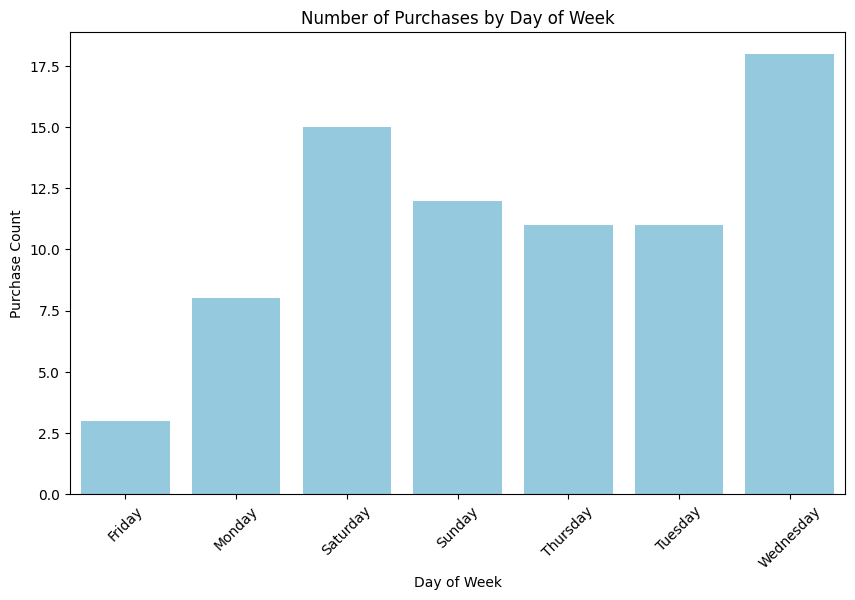

Chi-Square Test results - Chi² statistic: 12.4615 p-value: 0.0524


In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x=daySpending.index, y=daySpending['count'], color='skyblue')
plt.title('Number of Purchases by Day of Week')
plt.ylabel('Purchase Count')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

observed_counts = daySpending['count'].values
expected_counts = [observed_counts.sum() / len(observed_counts)] * len(observed_counts)
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print("Chi-Square Test results - Chi² statistic:", format(chi_stat, ".4f"), "p-value:", format(p_value, ".4f"))


***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

Hence, frequency of purchases do not vary significantly by day.

## Impulse vs. Planned

***Null Hypothesis (H0):*** There is no significant difference in average spending between purchases made after short intervals and those made after longer intervals.

***Alternative Hypothesis (HA):*** Purchases made after short intervals (impulsive) have significantly different spending compared to purchases made after longer intervals (planned).

T-statistic: -1.0208517272468345
P-value: 0.31836950758785265


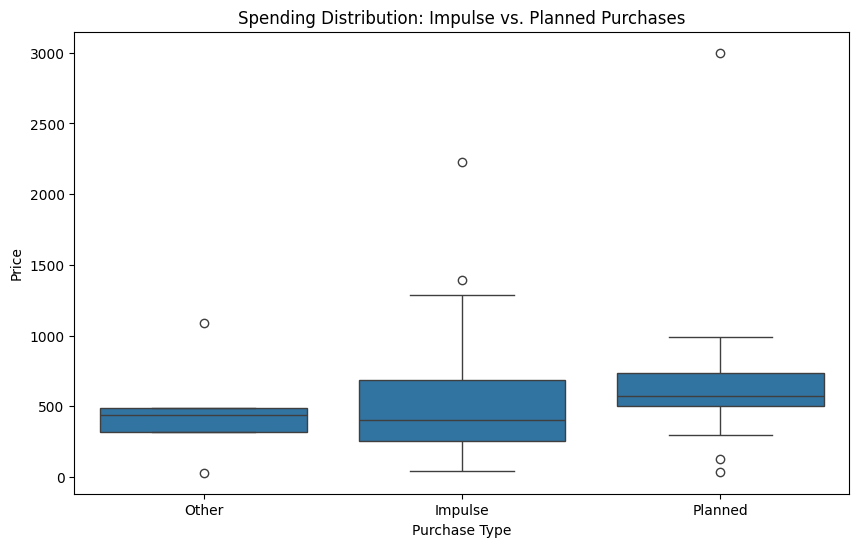

In [192]:
df = df.sort_values(by='purchase_date').reset_index(drop=True)
df['days_since_last_purchase'] = df['purchase_date'].diff().dt.days

df['purchase_type'] = 'Other'
df.loc[df['days_since_last_purchase'] <= 3, 'purchase_type'] = 'Impulse'
df.loc[df['days_since_last_purchase'] >= 7, 'purchase_type'] = 'Planned'

impulse_spending = df[df['purchase_type'] == 'Impulse']['price']
planned_spending = df[df['purchase_type'] == 'Planned']['price']

t_stat, p_value = ttest_ind(impulse_spending, planned_spending, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

plt.figure(figsize=(10, 6))
sns.boxplot(x='purchase_type', y='price', data=df)
plt.title("Spending Distribution: Impulse vs. Planned Purchases")
plt.xlabel("Purchase Type")
plt.ylabel("Price")
plt.show()

***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

So, there is no significant difference in average spending between purchases made after short intervals and those made after longer intervals.

# How does brand preference impact my purchase decisions and spending patterns?

### Average Spending per Brand

***Null Hypothesis (H0):*** There is no difference in average spending across brands.

***Alternative Hypothesis (HA):*** At least one brand has significantly different average spending than others.

***Methods:***

* I will use ANOVA test at a significance level of α = 0.05.

Brand-wise Spending Analysis:
                        mean  count      sum
brand_name                                  
Decathlon        3000.000000      1  3000.00
Suud Collection  1280.000000      1  1280.00
Özdilek          1190.000000      2  2380.00
Trendyol         1099.000000      1  1099.00
Rare Beauty       879.200000      1   879.20
Clinique          868.000000      1   868.00
Zara              794.166667     12  9530.00
H&M               744.495000      2  1488.99
Bershka           716.666667      3  2150.00
Clarins           704.000000      3  2112.00
Pull&Bear         684.000000      5  3420.00
MAC               654.825000      2  1309.65
Stanley           653.230000      1   653.23
Dilvin            629.000000      1   629.00
Stradivarius      620.000000      3  1860.00
Piev              554.900000      1   554.90
Merli             549.990000      2  1099.98
LOS OJOS          506.550000      2  1013.10
TRENDYOLMİLLA     488.656667      3  1465.97
Kiko Milano       387.800

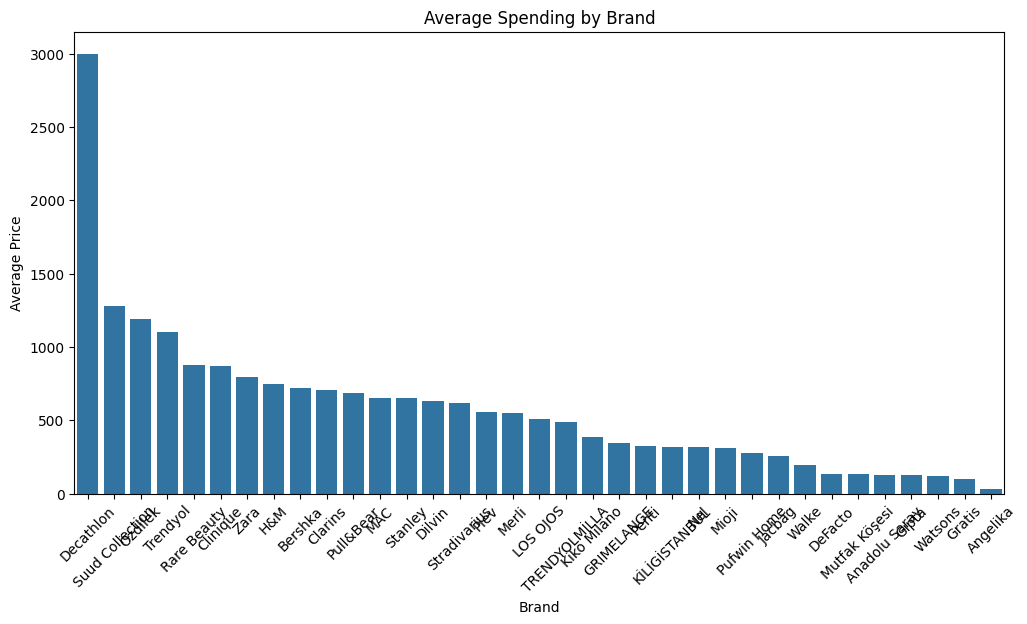

F-statistic: 3.49 p-value: 0.0001


In [193]:
brand_spending = df.groupby('brand_name')['price'].agg(['mean', 'count', 'sum']).sort_values('mean', ascending=False)
print("Brand-wise Spending Analysis:")
print(brand_spending)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_spending.index, y=brand_spending['mean'])
plt.title('Average Spending by Brand')
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

brands = df['brand_name'].unique()
samples = [df[df['brand_name'] == brand]['price'] for brand in brands]
f_stat, p_value = stats.f_oneway(*samples)

print("F-statistic:", format(f_stat, ".2f"), "p-value:", format(p_value, ".4f"))

***Conclusion:*** At α = 0.05, we reject the null hypothesis.

So, brand preference significantly impacts spending.

## Trend in Purchase Frequency for the Most Purchased Brand

***Null Hypothesis (H0):*** There is no trend in the purchase frequency (the purchase frequency is constant over time).

***Alternative Hypothesis (HA):*** There is a significant trend in the purchase frequency (the frequency is changing over time).

In [194]:
brand_purchase_counts = df.groupby('brand_name').size().sort_values(ascending=False)
most_purchased_brand = brand_purchase_counts.index[0]
print("The brand I purchase from the most is:", most_purchased_brand)

The brand I purchase from the most is: Zara


Brand: Zara
Mann-Kendall Test Statistic (S): 1
Z-statistic: 0.1879


/var/folders/8x/9b90szp97_3c8dvv2f13v6lr0000gn/T/ipykernel_19651/1370732294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_purchased['month'] = df_most_purchased['purchase_date'].dt.to_period('M')


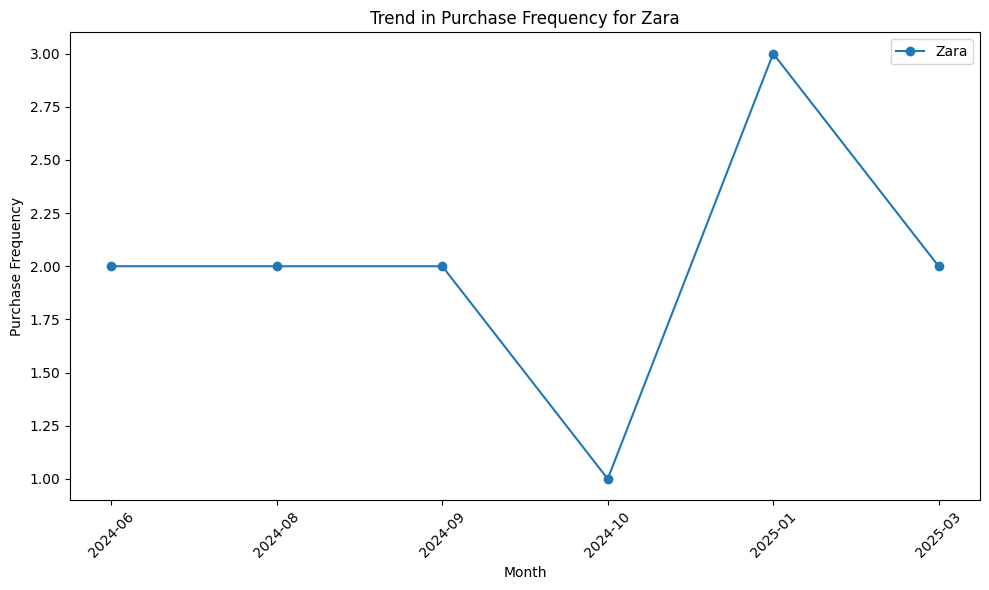

In [195]:
df_most_purchased = df[df['brand_name'] == most_purchased_brand]
df_most_purchased['month'] = df_most_purchased['purchase_date'].dt.to_period('M')
brand_monthly_frequency = df_most_purchased.groupby(['month']).size().reset_index(name='purchase_frequency')

def mann_kendall(series):
    n = len(series)
    S = 0
    for i in range(n):
        for j in range(i + 1, n):
            S += np.sign(series[j] - series[i])

    var_S = (n * (n - 1) * (2 * n + 5)) / 18
    z = S / np.sqrt(var_S) if var_S > 0 else 0
    return S, z

frequencies = brand_monthly_frequency['purchase_frequency'].values
S, z = mann_kendall(frequencies)

print("Brand: " + most_purchased_brand)
print("Mann-Kendall Test Statistic (S): " + str(S))
print("Z-statistic: " + format(z, ".4f"))


plt.figure(figsize=(10, 6))
plt.plot(brand_monthly_frequency['month'].astype(str), brand_monthly_frequency['purchase_frequency'], marker='o', label=most_purchased_brand)
plt.title(f'Trend in Purchase Frequency for {most_purchased_brand}')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

So, no significant trend has been detected for the most purchased brand.

# What is the relationship between the presence of discounts and my purchasing behavior?


## Effect of Discounts on Spending

***Null Hypothesis (H0):*** There is no difference in spending between purchases made with and without discounts.

***Alternative Hypothesis (HA):*** The presence of discounts leads to an increase in my purchases.

***Methods:***

* I will use independent t-test at a significance level of α = 0.05.
* **p-value < 0.05:** Reject H0 -> Discounts significantly affect spending.
* **p-value ≥ 0.05:** Fail to reject H0 -> No significant effect of discounts.

T-statistic: -2.7010
P-value: 0.0085


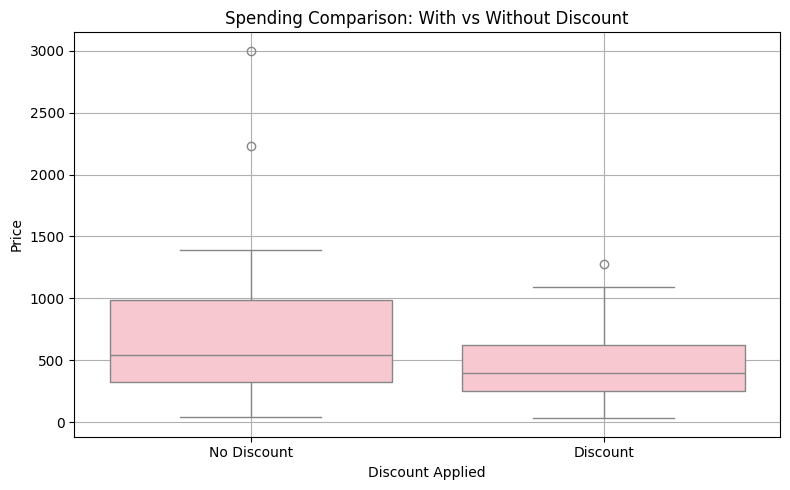

In [196]:
spending_with_discount = df[df['has_discount']]['price']
spending_without_discount = df[df['has_discount'] == False]['price']
t_stat, p_value = ttest_ind(spending_with_discount, spending_without_discount)

print("T-statistic:", format(t_stat, ".4f"))
print("P-value:", format(p_value, ".4f"))

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='has_discount', y='price', color='pink')
plt.xticks([0, 1], ['No Discount', 'Discount'])
plt.title('Spending Comparison: With vs Without Discount')
plt.xlabel('Discount Applied')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

***Conclusion:*** At α = 0.05, we reject the null hypothesis.

We can conclude that there is a significant difference in spending between discounted and non-discounted items.

# How does my menstrual cycle correlate with patterns in my purchasing decisions and spending?

## Menstrual Cycle and Spending

***Null Hypothesis (H0):*** There is no difference in spending between purchases made during the menstrual cycle and those made outside of it.

***Alternative Hypothesis (HA):*** Spending during the menstrual cycle differs from spending outside of it.

***Methods:***

* I will use independent t-test at a significance level of α = 0.05.
* **p-value < 0.05:** Reject H0 -> Spending differs significantly during the menstrual cycle.
* **p-value ≥ 0.05:** Fail to reject H0 -> No significant difference in spending related to the menstrual cycle.

T-statistic: -0.1449929759267477
P-value: 0.8851002546571942


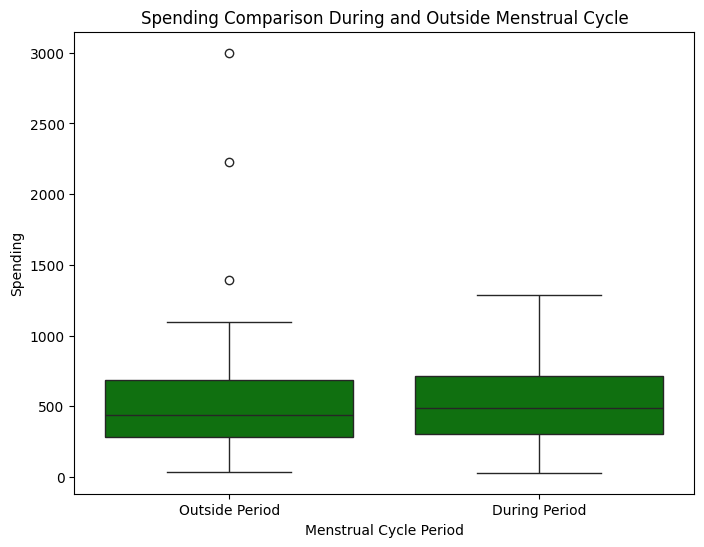

In [197]:
df['hormonal_cycle'] = df['hormonal_cycle'].astype(bool)
spending_during_period = df[df['hormonal_cycle']]['price']
spending_outside_period = df[df['hormonal_cycle'] == False]['price']

t_stat, p_value = ttest_ind(spending_during_period, spending_outside_period)

print("T-statistic:", t_stat)
print("P-value:", p_value)

df['period_label'] = np.where(df['hormonal_cycle'], 'During Period', 'Outside Period')
plt.figure(figsize=(8, 6))

sns.boxplot(x='period_label', y='price', data=df, color="green")
plt.title('Spending Comparison During and Outside Menstrual Cycle')
plt.xlabel('Menstrual Cycle Period')
plt.ylabel('Spending')
plt.show()


***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

So, there is no significant difference in spending related to menstrual cycle.

## Menstrual Cycle and Category Preference

***Null Hypothesis (H0):*** There is no significant difference in product category preferences during menstruation.

***Alternative Hypothesis (HA):*** There is a significant difference in product category preferences during menstruation.

***Methods:***

* I will use Chi-square test at a significance level of α = 0.05.

Chi-square Statistic (Category Preferences): 8.414644465746589
P-value (Category Preferences): 0.20927139709270545


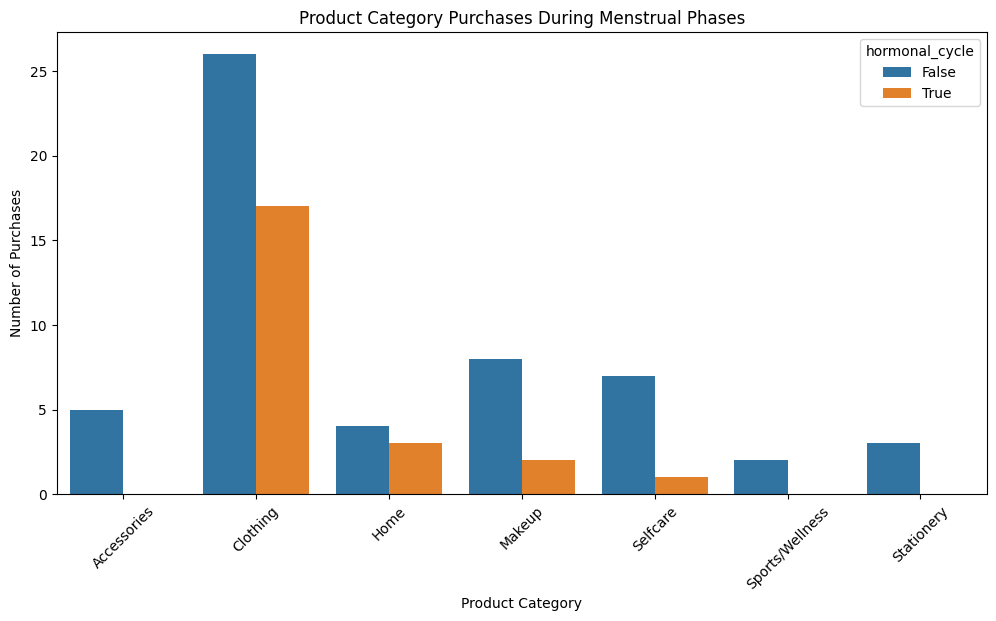

In [198]:
category_counts = df.groupby(['hormonal_cycle', 'category']).size().reset_index(name='count')
contingency_table = category_counts.pivot(index='hormonal_cycle', columns='category', values='count').fillna(0)
chi2_stat, p_value_category, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic (Category Preferences):", chi2_stat)
print("P-value (Category Preferences):", p_value_category)

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='count', hue='hormonal_cycle', data=category_counts)
plt.title('Product Category Purchases During Menstrual Phases')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

So, there is no significant difference in product category preferences during menstruation.

# What is the relationship between proximity to my salary date and my purchasing behavior?


## Near vs. Far from Salary

***Null Hypothesis (H0):*** There is no significant difference in the frequency of purchases made near salary dates and those made far from salary dates.

***Alternative Hypothesis (HA):*** There is a significant difference in the frequency of purchases made near salary dates and those made far from salary dates.

***Methods:***

* I will use an independent samples t-test to compare the average prices of items bought within 7 days of the salary date "Near Salary" vs. those bought at other times "Far from Salary" at the significance level (α) of 0.05.

T-statistic: -1.503369773589748
P-value: 0.136887963055935


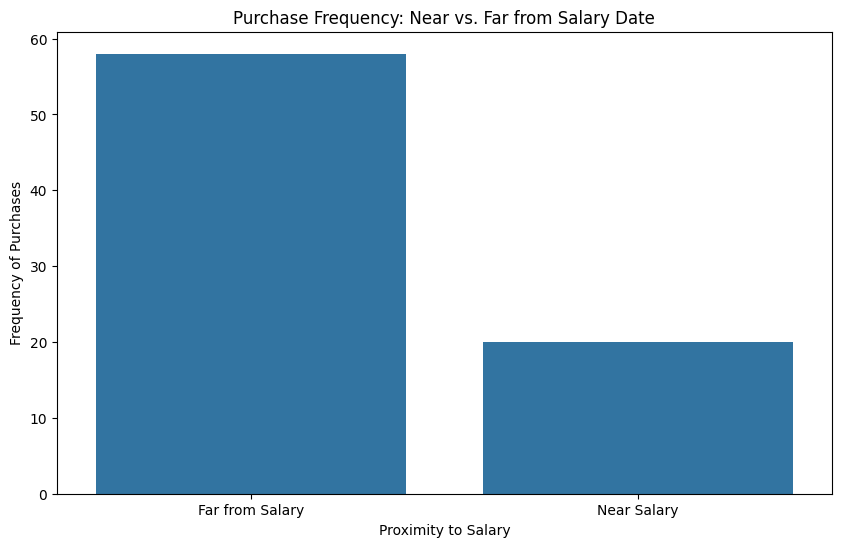

In [199]:
salary_labels = []
for value in df['proximity_to_my_salary_date']:
    if value <= 7:
        salary_labels.append('Near Salary')
    else:
        salary_labels.append('Far from Salary')

df['salary_label'] = salary_labels
near_salary = df[df['salary_label'] == 'Near Salary']
far_from_salary = df[df['salary_label'] == 'Far from Salary']
t_stat, p_value = ttest_ind(near_salary['price'], far_from_salary['price'])

print("T-statistic:", t_stat)
print("P-value:", p_value)

plt.figure(figsize=(10, 6))
sns.countplot(x='salary_label', data=df)
plt.title('Purchase Frequency: Near vs. Far from Salary Date')
plt.xlabel('Proximity to Salary')
plt.ylabel('Frequency of Purchases')
plt.show()


***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

So, there is no significant relationship between proximity to salary and purchasing frequency.

# How do seasonal factors influence my purchasing patterns and expenditures?

## Spending Distribution Across Seasons

***Null Hypothesis (H0):*** Seasonal variation does not significantly affect how much I spend.

***Alternative Hypothesis (HA):*** The amount I spend varies significantly across different seasons.

***Methods:***

* I will use a one-way ANOVA test at the significance level of α = 0.05.

F-statistic: 0.33317863164600553
P-value: 0.8013707683595697


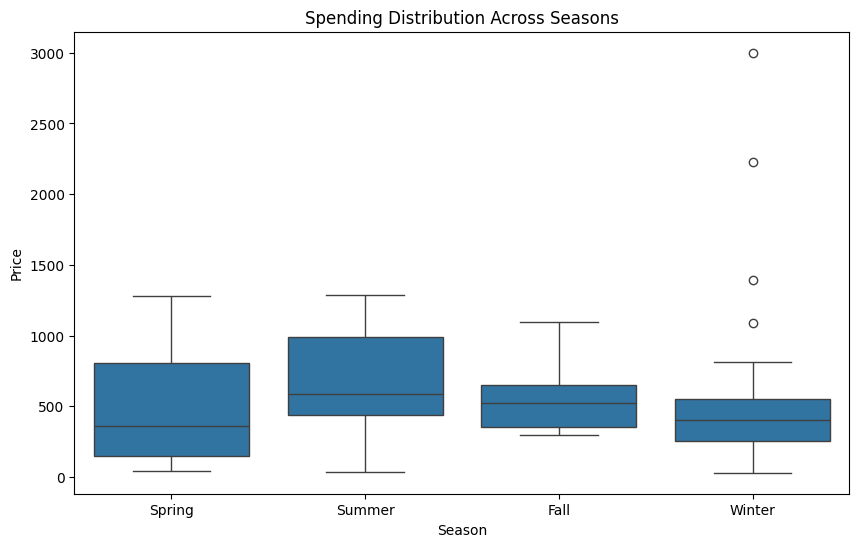

In [200]:
seasons = df['season'].unique()
seasonal_prices = [df[df['season'] == season]['price'] for season in seasons]
f_stat, p_value = f_oneway(*seasonal_prices)

print("F-statistic:", f_stat)
print("P-value:", p_value)

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='price', data=df)
plt.title('Spending Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Price')
plt.show()

***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

So, there is no significant relationship between seasonal factors and my purchasing behavior.

# How does the product category affect my spending and purchase frequency?

## Spending Distribution Across Product Categories

***Null Hypothesis (H0):*** The amount I spend does not significantly differ between product categories.

***Alternative Hypothesis (HA):*** There is a significant difference in spending across different product categories.

***Methods:***

* I will use a one-way ANOVA test at the significance level of α = 0.05.

F-statistic: 1.9466603031940126
P-value: 0.08500394106193777


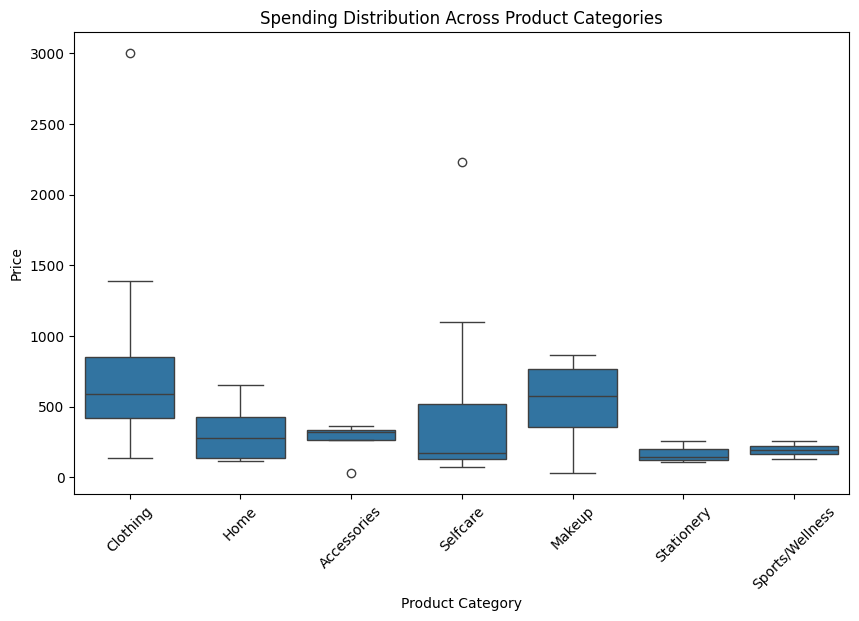

In [203]:
categories = df['category'].unique()
category_prices = [df[df['category'] == category]['price'] for category in categories]
f_stat, p_value_spending = f_oneway(*category_prices)

print("F-statistic:", f_stat)
print("P-value:", p_value_spending)

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title('Spending Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

We can conclude that there is no significant difference in spending across product categories.

## Spending Distribution Across Seasons

***Null Hypothesis (H0):*** Purchases are evenly distributed across all product categories.

***Alternative Hypothesis (HA):*** There is a significant difference in how frequently I purchase from different product categories.

***Methods:***

* I will use a Chi-Square Goodness of Fit test at the significance level of α = 0.05.

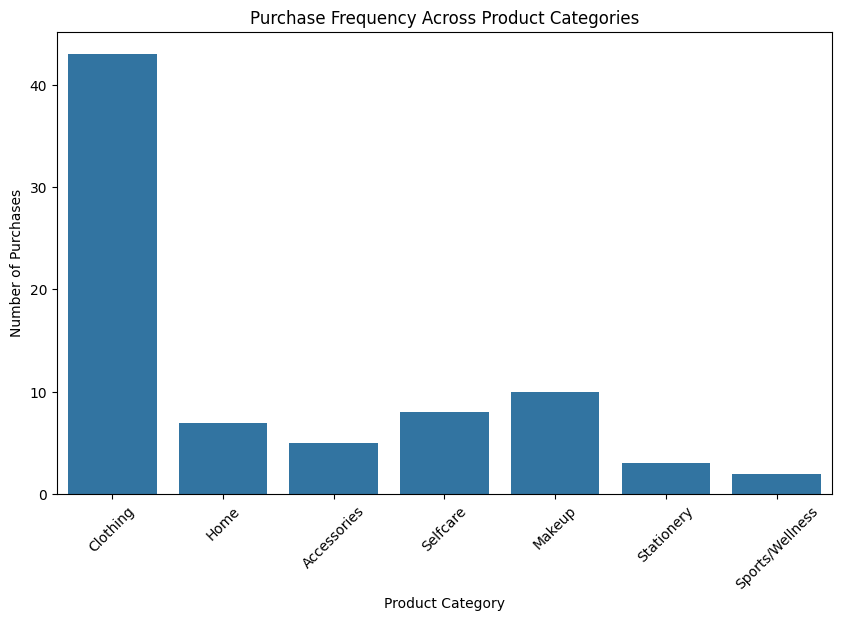

Chi-square Statistic: 0.0
P-value: 1.0


In [204]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Purchase Frequency Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

purchase_counts = df['category'].value_counts()
observed = purchase_counts.values.reshape(-1, 1)

chi2_stat, p_value_frequency, dof, expected = chi2_contingency(observed)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value_frequency)

***Conclusion:*** At α = 0.05, we fail to reject the null hypothesis.

So, there is no significant difference in purchase frequency across product categories.